# Understanding Contours, Convex Hull, and Convexity Defects

This tutorial was kindly contributed by Tan Chin Luh (Tritytech), updated and converted to a Notebook by Vincent Couvert (Dassault Systèmes S.E.).

It leverages the Scilab Computer Vision Module (**sciCV**):
https://atoms.scilab.org/toolboxes/scicv/

In computer vision, we always need to extract information from an image before we could use the it for further operation. For example, we need to extract information of the hand gestures, whether the palm is open or close, and we use it to control a gripper of a robotic arm to pick up or drop something. This could be done by using Structural Analysis methods.

![Original hand.png image](images/hand.png)

## Importing Image

Scilab **sciCV** module is using `imread` to read in the image from image file. Following lines will initialize **sciCV** module and read the image "hand.png" in the "images" folder. The second argument is optional to import the image in grayscale format.

In [1]:
// Initialize sciCV
scicv_Init();

// Load Image
S = imread("images/hand.png",CV_LOAD_IMAGE_GRAYSCALE);

// Display Loaded Image
matplot(S);

## Convert Image to Binary

The following lines perform the blurring of the image and then convert the gray image to binary image using `threshold` function. We are choosing a big number in this case as the object and background are both rather bright. The last argument of the `threshold` function is used to invert the binary image so that the object will be represented in white, and the background in black. 

Note: ffor image with darker background than object, use `THRESH_BINARY`).

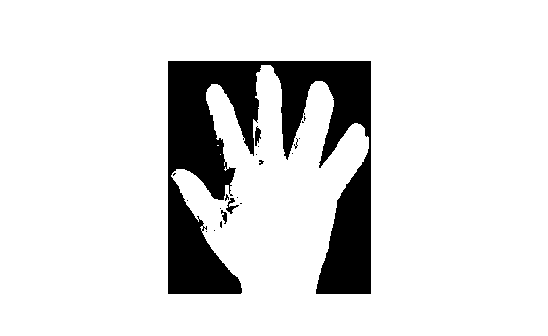

In [2]:
// Image Bluring (depending on situation)
Sb = GaussianBlur(S, [35, 35], 0.1);

// Convert To Inverse Binary
[thresh, img_bw] = threshold(Sb, 220, 255, THRESH_BINARY_INV);

// Display Resulting Image
matplot(img_bw);

## Finding Object Contours
Inh the binary image, we could find the contours of the object, and choose the contour which we are interested for further processing. In this case, since the palm is the biggest object (actually the only object) in the image, we choose the largest contour detected and overlap with the original image for comparison.

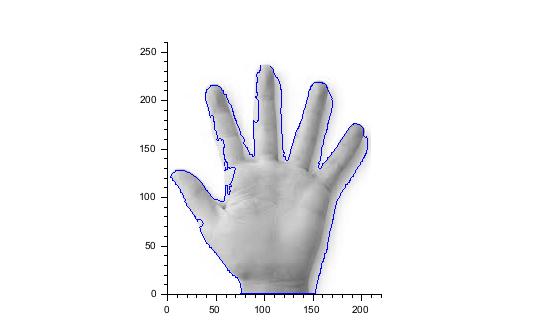

In [3]:
// Find the Largest Contour
[contours, _] = findContours(img_bw, CV_RETR_TREE, CHAIN_APPROX_SIMPLE);
sc = zeros(1,size(contours)-1);
for cnt = 1:size(contours)-1
    cont = contours(cnt);
    sc(cnt)=size(cont(:),2);
end
[maxV,maxI] = max(sc);

// Show the Image, Contour of the Largest Component, and the Convex Hull of it
matplot(Sb);
sz = size(Sb);
if ~isempty(maxI);
    cont = contours(maxI);
    hull = convexHull(cont);
    hulld = double(hull(:));
    plot(cont(:)(1,:),sz(1)-cont(:)(2,:));
end

## Convex Hull
The convex hull is the "envelop" of the contour we detected. Following commands will find the convex hull of our largest contour and plot on the same graph.

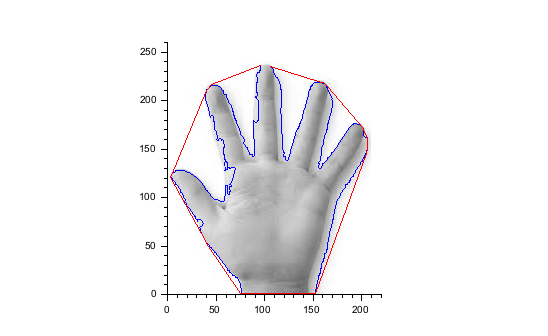

In [4]:
// Display Loaded Image
matplot(Sb);

// Show Contours and Envelop
sz = size(Sb);
if ~isempty(maxI);
    cont = contours(maxI);
    hull = convexHull(cont);
    hulld = double(hull(:));
    plot(cont(:)(1,:),sz(1)-cont(:)(2,:));
    plot(hulld(:,2),sz(1)-hulld(:,1),"r");
end

## Convexity Defects and Visualization

Convexity Defects are the cavities in an objects. In other words, they are the distances from the envelop to the valleys of the contour. In this part of tutorial, we will try to find the convexity defects and visualize them on the same plot.

In [5]:
// Display Loaded Image
matplot(Sb);

// Show Contours and Envelop
plot(cont(:)(1,:),sz(1)-cont(:)(2,:));
plot(hulld(:,2),sz(1)-hulld(:,1),"r");

// Calculating and Visualizing Convexity Defects
hull2 = convexHull(cont,%f,%f);
defects = convexityDefects(cont,hull2);
dd = double(defects(:));

// Finding Convexity Defects
for cnt = 1:size(dd,1)

    fixpt_depth = dd(cnt,1) / 256.0;
    
    // Show the Defects > 50 
    if fixpt_depth > 50
        start_pt = cont(:)(:,dd(cnt,$)+1);
        plot(start_pt(1),sz(1)-start_pt(2),"or");
        xstring(start_pt(1),sz(1)-start_pt(2),string(cnt)+"s");
        gce().font_size = 3;
        
        end_pt = cont(:)(:,dd(cnt,$-1)+1);
        plot(end_pt(1),sz(1)-end_pt(2),"xg");
        xstring(end_pt(1),sz(1)-end_pt(2),string(cnt)+"e");
        gce().font_size = 3;
        
        depth_pt = cont(:)(:,dd(cnt,$-2)+1);
        plot(depth_pt(1),sz(1)-depth_pt(2),"*g");
        xstring(depth_pt(1),sz(1)-depth_pt(2),string(cnt)+"f");
        gce().font_size = 3;
        
        // Calculating Don
        m = (end_pt(2)-start_pt(2))/(end_pt(1)-start_pt(1));
        c = end_pt(2)-m*end_pt(1);
        m2 = -1/m;
        c2 = depth_pt(2)-m2*depth_pt(1);
        A = [-m 1;-m2 1];B = [c;c2];
        ptc = A\B;
        
        plot(ptc(1),sz(1)-ptc(2),"vr");
        
        plot([ptc(1),depth_pt(1)],[sz(1)-ptc(2),sz(1)-depth_pt(2)],"k")
        gce().children.thickness = 3;
    end
end

In image above:
 - The number with the "s" behind indicates the starting point the line which is perpendicular to the farthest contour point to the hull (depth point).
 - The "e" is the ending point, while the "f" is the depth point.
 - The black thick line is the perpendicular line going from the depth point to the hull, in which the depth would be measured.

## What to Try Next?

Using this information, we could develop a system to control a robotic arm controlled by using our hand movement as shown in this [article](https://www.linkedin.com/pulse/scilab-computer-vision-connected-robotic-arm-tan-chin-luh).